In [511]:
# Setup
import pandas as pd
import numpy as np

In [512]:
#setup to download data directly from the databank
import pandas_datareader
import datetime

In [513]:
#setup to download data directly from world data bank
from pandas_datareader import wb

In [514]:
#define countries we are looking for
countries = ["CN","JP","BR","US","DK","ES","TM","IN","NG"]

In [515]:
#define indicator
indicators = {"NY.GDP.PCAP.KD":"GDP per capita", "NY.GDP.MKTP.CD":"GDP(current US $)", "SP.POP.TOTL":"Population total", 
              "SP.URB.TOTL.IN.ZS":"Urban Population in %", "SP.DYN.TFRT.IN":"Fertility Rate", "SE.ADT.LITR.ZS": "Literacy rate, adult total in %" }

In [516]:
#example download world data bank shown in the lecture
data_wb = wb.download(indicator= indicators, country= countries, start=1990, end=2017)
data_wb = data_wb.rename(columns = {"NY.GDP.PCAP.KD":"gdp_pC","NY.GDP.MKTP.CD":"gdp", "SP.POP.TOTL":"pop", "SP.URB.TOTL.IN.ZS":"urban_pop%", 
                                    "SP.DYN.TFRT.IN":"frt", "SE.ADT.LITR.ZS":"litr"})
data_wb = data_wb.reset_index()
data_wb.head(-5)

,country,year,gdp_pC,gdp,pop,urban_pop%,frt,litr
0,Brazil,2017,10888.98,2055505502224.73,209288278,86.31,nan,nan
1,Brazil,2016,10868.65,1793989048409.29,207652865,86.04,1.73,nan
2,Brazil,2015,11351.57,1802214373741.32,205962108,85.77,1.74,92.05
3,Brazil,2014,11870.15,2455993625159.37,204213133,85.49,1.75,91.73
4,Brazil,2013,11915.42,2472806919901.67,202408632,85.21,1.76,91.48
5,Brazil,2012,11673.77,2465188674415.03,200560983,84.92,1.78,91.34
6,Brazil,2011,11560.42,2616201578192.25,198686688,84.63,1.79,91.41
7,Brazil,2010,11224.15,2208871646202.82,196796269,84.33,1.80,90.38
8,Brazil,2009,10538.78,1667019780934.28,194895996,84.04,1.82,90.30
9,Brazil,2008,10656.87,1695824571927.15,192979029,83.75,1.85,90.04


In [517]:
#Tonje 
data_wb.dtypes

country        object
year           object
gdp_pC        float64
gdp           float64
pop             int64
urban_pop%    float64
frt           float64
litr          float64
dtype: object

In [518]:
#Tonje
#Generate GDP in 100 millions and add to data_wb
data_wb["gdp_100mill"]= data_wb.gdp/100000000

#check that its added 
data_wb.head(5)

,country,year,gdp_pC,gdp,pop,urban_pop%,frt,litr,gdp_100mill
0,Brazil,2017,10888.98,2055505502224.73,209288278,86.31,nan,nan,20555.06
1,Brazil,2016,10868.65,1793989048409.29,207652865,86.04,1.73,nan,17939.89
2,Brazil,2015,11351.57,1802214373741.32,205962108,85.77,1.74,92.05,18022.14
3,Brazil,2014,11870.15,2455993625159.37,204213133,85.49,1.75,91.73,24559.94
4,Brazil,2013,11915.42,2472806919901.67,202408632,85.21,1.76,91.48,24728.07


In [519]:
#drop old GDP
data_wb.drop(['gdp'], axis = 1, inplace = True)

#check that its droped 
data_wb.head(5)

#new interpretation of GDP: GDP (current $US), measured in 100 millions 

,country,year,gdp_pC,pop,urban_pop%,frt,litr,gdp_100mill
0,Brazil,2017,10888.98,209288278,86.31,nan,nan,20555.06
1,Brazil,2016,10868.65,207652865,86.04,1.73,nan,17939.89
2,Brazil,2015,11351.57,205962108,85.77,1.74,92.05,18022.14
3,Brazil,2014,11870.15,204213133,85.49,1.75,91.73,24559.94
4,Brazil,2013,11915.42,202408632,85.21,1.76,91.48,24728.07


In [520]:
#Tonje 
#Set number of decimals to 2 
pd.set_option('precision', 2)
pd.set_option('display.float_format', lambda x: '%.2f' % x)




In [521]:
#Tonje
#Check that it worked 
data_wb.head(5)

,country,year,gdp_pC,pop,urban_pop%,frt,litr,gdp_100mill
0,Brazil,2017,10888.98,209288278,86.31,nan,nan,20555.06
1,Brazil,2016,10868.65,207652865,86.04,1.73,nan,17939.89
2,Brazil,2015,11351.57,205962108,85.77,1.74,92.05,18022.14
3,Brazil,2014,11870.15,204213133,85.49,1.75,91.73,24559.94
4,Brazil,2013,11915.42,202408632,85.21,1.76,91.48,24728.07


In [495]:
# save datasheet as excel (just to see it)_index=false to avoid saving the index
writer = pd.ExcelWriter('pandas_simple.xlsx', engine='xlsxwriter')
data_wb.to_excel(r"C:\Users\Lisa1\Desktop\MarieDokumente\Uni\Master\VWL\Phython Introduction\project_1\data_wb.xlsx")

In [522]:
data_wb.shape

(252, 8)

In [523]:
#summary statistics
data_wb.describe()

,gdp_pC,pop,urban_pop%,frt,litr,gdp_100mill
count,252.00,252.00,252.00,243.00,37.00,252.00
mean,21233.40,353535362.68,62.67,2.50,87.00,27119.59
std,20848.11,464366860.30,22.31,1.43,15.39,41608.81
min,530.89,3683966.00,25.55,1.13,48.22,23.79
25%,2131.25,40015504.75,42.57,1.55,88.62,2756.12
50%,9117.39,133683074.50,76.10,1.93,91.48,6845.03
75%,42252.61,309914885.75,81.58,2.86,97.75,39397.35
max,61582.17,1386395000.00,91.53,6.49,99.70,193906.04


In [524]:
# detect for missing data
## count missing data
data_wb.isnull().sum().sum()

224

In [525]:
## number of observations
data_wb.count()

country        252
year           252
gdp_pC         252
pop            252
urban_pop%     252
frt            243
litr            37
gdp_100mill    252
dtype: int64

In [526]:
## missing value of each variable
data_wb.isnull().sum()

country          0
year             0
gdp_pC           0
pop              0
urban_pop%       0
frt              9
litr           215
gdp_100mill      0
dtype: int64

In [527]:
# drop litr
data_wb.drop(['litr'], axis = 1, inplace = True)

In [528]:
#search for the nine missing values in frt
round(data_wb.groupby('year').mean(),2)

,gdp_pC,pop,urban_pop%,frt,gdp_100mill
year,,,,,
1990,17322.45,296754760.00,57.06,2.98,12202.76
1991,17480.06,301483292.67,57.39,2.92,13087.05
1992,17614.30,306083205.00,57.71,2.86,13770.11
1993,17609.77,310600879.44,58.04,2.79,14654.15
1994,18033.67,315117504.67,58.36,2.73,15980.84
1995,18406.36,319614237.22,58.70,2.67,17574.43
1996,18865.59,324075633.00,59.06,2.61,17686.48
1997,19293.24,328551075.67,59.42,2.57,17886.12
1998,19603.76,332962293.00,59.78,2.53,18090.47


In [529]:
#show frt only for 2017
data_wb.loc[data_wb['year'] == "2017", :].head(-1)

,country,year,gdp_pC,pop,urban_pop%,frt,gdp_100mill
0,Brazil,2017,10888.98,209288278,86.31,nan,20555.06
28,China,2017,7329.09,1386395000,57.96,nan,122377.00
56,Denmark,2017,61582.17,5769603,87.76,nan,3248.72
84,Spain,2017,32405.75,46572028,80.08,nan,13113.20
112,India,2017,1964.60,1339180127,33.60,nan,26008.18
140,Japan,2017,48556.93,126785797,91.53,nan,48721.37
168,Nigeria,2017,2412.20,190886311,49.52,nan,3757.45
196,Turkmenistan,2017,7317.55,5758075,51.15,nan,379.26


In [530]:
# drop the year for which the data is missing 
I = data_wb['year'] == "2017"
data_wb.drop(data_wb[I].index, inplace = True)
# => data cleaning done

In [531]:
#summary statistics
data_wb.describe()

data_wb.count()
#=>data cleaning finished

country        243
year           243
gdp_pC         243
pop            243
urban_pop%     243
frt            243
gdp_100mill    243
dtype: int64

In [532]:
data_wb.shape

(243, 7)

In [533]:
# make some cool groupby things see lecture basic_data
##empl.groupby('municipality')['e'].mean().head(10)
##empl.groupby('year')['e'].mean().plot
# demean to compare it better
##stocks2.groupby('firm')['close_demeaned'].plot(legend=True); 
##plt.title('Stock price: deviation from time-average'); 
# perform summary statistics
## nameofdataset.describe()
# maybe create an interactive table for each country
##see load_save_and_structure_data
#correlation table?
# maybe perform a simple regression
# world maps as diagramm

#graphs -GDP and fertility rate 

In [534]:
#Tonje 
import matplotlib.pyplot as plt
%matplotlib inline 
from ipywidgets import interact, interactive, fixed, interact_manual 
import ipywidgets as widgets 


In [535]:
#Tonje 
country=data_wb["country"]
year=data_wb["year"]
gdp_pC=data_wb["gdp_pC"]


In [536]:
#Tonje 
def interactive_figure(country, data_wb):
    """define an interactive figure that uses countries and the dataframe as inputs """
    
    data_country = data_wb[data_wb.country == country]
    year = data_country.year
    gdp_pC = data_country.gdp_pC
    fig = plt.figure(dpi=100)
    ax = fig.add_subplot(1,1,1)
    ax.plot(year, gdp_pC)
    ax.set_xlabel("Years")
    ax.set_ylabel("GDP per Capita")
    plt.xticks(rotation=90)
    plt.gca().invert_xaxis()



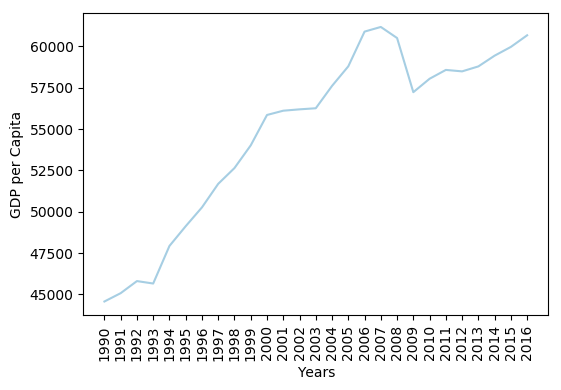

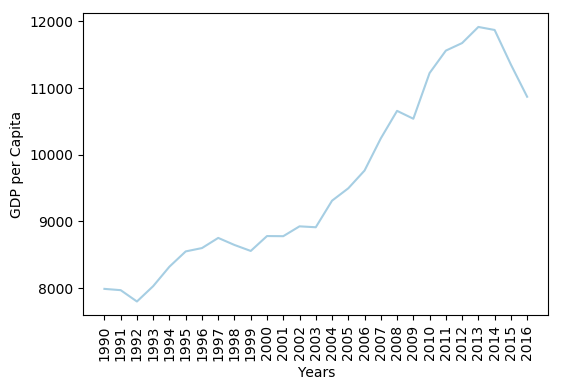

In [537]:
#Tonje
#Just to check that it works for different inputs 
interactive_figure('Denmark',data_wb)
interactive_figure('Brazil',data_wb)



In [538]:
#Tonje
widgets.interact(interactive_figure,
    year = widgets.fixed(year),
    data_wb = widgets.fixed(data_wb),
    country=widgets.Dropdown(description="Country", options=data_wb.country.unique()),
    gdp_pC=widgets.fixed(gdp_pC)
);

interactive(children=(Dropdown(description='Country', options=('Brazil', 'China', 'Denmark', 'Spain', 'India',…

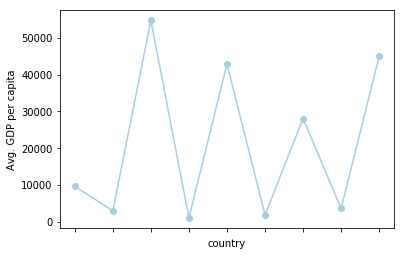

In [540]:
#Tonje
#Average GDP per capita?
ax = data_wb.groupby("country")['gdp_pC'].mean().plot(kind='line', style='-o'); 
ax.set_ylabel('Avg. GDP per capita'); 